# Stacked Bar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


class StackedBar():
    """
    @Author: José de Jesús Tapia López
    Summary: Clase que muestra la(s) gráfica(s) de barras apiladas (Stacked Bar) de manera simple o 
    o en porcentaje.
    Parameters: listaDeListas, colores, tuplaCategorias, tuplaLeyenda, nombreXLabel, 
    nombreYLabel, y_tick_menor, y_tick_mayor, title, tamanio_figura, width
    Muestra una gráfica de barras apiladas
    
    La gráfica de barras apiladas es una gráfica que segmenta sus barras de conjuntos de datos 
    múltiples uno encima del otro. Se utilizan para mostrar cómo una categoría más grande se 
    divide en categorías más pequeñas y cuál es la relación de cada parte con la cantidad total. 
    Hay dos tipos de gráficos de barras apiladas:
    
    A) Gráficos de barras apiladas simples: Colocan cada valor para el segmento después del 
    anterior. El valor total de la barra es todos los valores de segmento agregados juntos. 
    Ideal para comparar las cantidades totales en cada grupo / barra segmentada.
    
    B) Los gráficos de barras de apilamiento del 100% muestran el porcentaje del total de cada 
    grupo y se grafican por el porcentaje de cada valor con respecto a la cantidad total en 
    cada grupo. Esto facilita ver las diferencias relativas entre cantidades en cada grupo.
    
    Por lo tanto, esta clase cuenta con tres métodos:
    Methods:
    -stackedBarSimple; que muestra la gráfica del inciso A)
    -percentStackedBar; que muestra la gráfica del inciso B)
    -bothStackedBar; que muestra dos subgráficas de los dos incisos.
    
    Cada método de esta clase recibe como argumento diez u once  parámetros:
    listaDeListas: Una lista que tiene varias listas, estas son conjuntos de datos múltiples.
    colores: Lista de colores y el orden en que estos van a ir apareciendo de manera ascendente 
             en la gráfica.
    tuplaCategorias: Tupla de las etiquetas del eje x.
    tuplaLeyenda: Tupla de la leyenda de la gráfica
    nombreXLabel: Cadena del nombre del eje X
    nombreYLabel: Cadena del nombre del eje Y
    y_tick_menor: minor tick del eje Y
    y_tick_mayor: major tick del eje Y
    title: Cadena del título de la gráfica
    tamanio_figura: tamaño de la figura/gráfica
    width: Flotante que indica el ancho entre cada barra, que por defecto es 0.5
    

    """
    
    # Creamos el constructor
    def __init__(self, listaDeListas, colores, tuplaCategorias, tuplaLeyenda, nombreXLabel, 
                 nombreYLabel, y_tick_menor, y_tick_mayor, title, tamanio_figura, width=0.5):
        self.listaDeListas = listaDeListas
        self.colores = colores
        self.tuplaCategorias = tuplaCategorias
        self.tuplaLeyenda = tuplaLeyenda
        self.nombreXLabel = nombreXLabel
        self.nombreYLabel = nombreYLabel
        self.y_tick_menor = y_tick_menor
        self.y_tick_mayor = y_tick_mayor
        self.title = title
        self.tamanio_figura = tamanio_figura
        self.width = width

    def stackedBarSimple(self):
        ind = np.arange(len(self.listaDeListas[0]))    # las ubicaciones x para los grupos
        # Creamos una lista vacía que nos servirá para ir mostrando las barras de la gráfica
        p = []
        # Creamos la función suma para ir acumulando y poniendo las barras apiladas
        suma = lambda x, y: [x_ + y_ for x_,y_ in zip(x,y)]
        
        # Realizamos el siguiente ciclo para indicar en qué parte se van a ir apilando las barras apiladas,
        # en caso de la lista de medias tenga más de una categoría
        if len(self.listaDeListas) >= 2:
            self.fondo = suma(self.listaDeListas[0],self.listaDeListas[1])
        # Inicializamos la figura principal y una subgráfica en un arreglo de tipo 1x1 (Una sola subgráfica).
        self.fig, self.axes = plt.subplots(1, figsize = self.tamanio_figura)
        # El siguiente ciclo es para indicar dónde vamos a colocar las gráficas apiladas, que en este caso
        # es donde termina la barra apilada que se acababan de poner
        for m in range(len(self.listaDeListas)):
            if m == 0:
                p.append(plt.bar(ind, self.listaDeListas[m], self.width, color = self.colores[m]))
            elif m == 1:
                p.append(plt.bar(ind, self.listaDeListas[m], self.width, bottom = self.listaDeListas[0], 
                                 color = self.colores[m]))
            else:
                p.append(plt.bar(ind, self.listaDeListas[m], self.width, bottom = self.fondo, 
                                 color = self.colores[m]))
                self.fondo =  suma(self.fondo, self.listaDeListas[m])
        # Definimos el título general de la figura (No separamos las subgráficas porque solo es una...)
        self.axes.set_title(self.title)
        # Definimos las etiquetas de los ejes (Axis) para la subgráfica.
        self.axes.set_xlabel(self.nombreXLabel)
        self.axes.set_ylabel(self.nombreYLabel)
        # limite del eje X 
        self.axes.set_xticks(ind)
        # Establecemos las etiquetas con una tupla de etiquetas 
        self.axes.set_xticklabels(self.tuplaCategorias)
        p_aux = []
        for pi in p:
            p_aux.append(pi)
        p_aux = tuple(p_aux)
        # Establecemos la leyenda de la subgráfica en la 'mejor' posición 
        self.axes.legend(p_aux, self.tuplaLeyenda, loc = 'best')
        # Establecemos las rejillas
        self.axes.grid()
        # Establecemos los ticks (menor y mayor), solo nos importa el eje Y pues solo ese ocupamos
        # (Aquí va el límite del eje Y)
        self.axes.yaxis.set_major_locator(MultipleLocator(y_tick_mayor))
        self.axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
        self.axes.yaxis.set_minor_locator( MultipleLocator(y_tick_menor))
        # Spines
        self.axes.spines['left'].set_smart_bounds(True)
        self.axes.spines['bottom'].set_smart_bounds(True)

    def percentStackedBar(self):
        # La siguiente lista es para los porcentajes
        r =  [i for i in range(len(self.listaDeListas[0]))]
        # Creamos una lista vacía que nos servirá para ir mostrando las barras de la gráfica
        p = []
        # Creamos la función suma para ir acumulando y poniendo las barras apiladas
        suma = lambda x, y: [x_ + y_ for x_,y_ in zip(x,y)]
        
        # Realizamos el siguiente ciclo para indicar en qué parte se van a ir apilando las barras apiladas,
        # en caso de la lista de medias tenga más de una categoría
        if len(self.listaDeListas) >= 2:
            total = suma(self.listaDeListas[0], self.listaDeListas[1])
        # El total nos sirve para dividir de manera proporcional en porcentajes las barras apiladad,
        # para que de manera conjunta sumen 100%
        for i in range(2,len(self.listaDeListas)):
            total =  suma(total,self.listaDeListas[i])
        # Creamos esta lista vacía que nos servirá para ir 'pegando' las barras apiladas, esto mediante
        # el próximo ciclo:
        barras = []
        for j in range(len(self.listaDeListas)):
            barras.append([i / j * 100 for i,j in zip(self.listaDeListas[j], total)])
        # El fondo, como está en porcentajes, lo inicializamos:
        if len(self.listaDeListas) >= 2:
            fondo = suma(barras[0],barras[1])

        # Inicializamos la figura principal y una subgráfica en un arreglo de tipo 1x1 (Una sola subgráfica).
        self.fig, self.axes = plt.subplots(1, figsize = self.tamanio_figura)
        
        # El siguiente ciclo es para indicar dónde vamos a colocar las gráficas apiladas, que en este caso
        # es donde termina la barra apilada que se acababan de poner
        for m in range(len(self.listaDeListas)):

            if m == 0:
                p.append(plt.bar(r, barras[m], self.width, color = colores[m]))
            elif m == 1:
                p.append(plt.bar(r, barras[m], self.width, bottom = barras[m-1], color = self.colores[m]))
            else:
                p.append(plt.bar(r, barras[m], self.width, bottom = fondo, color = self.colores[m]))
                fondo =  suma(fondo,barras[m])

        # Definimos el título general de la figura (No separamos las subgráficas porque solo es una...)
        self.axes.set_title(self.title)
        # Definimos las etiquetas de los ejes (Axis) para la subgráfica
        self.axes.set_xlabel(self.nombreXLabel)
        self.axes.set_ylabel(self.nombreYLabel)
        # limite del eje X 
        self.axes.set_xticks(r)
        # Establecemos las etiquetas con una tupla de etiquetas 
        self.axes.set_xticklabels(self.tuplaCategorias)
        p_aux = []
        for pi in p:
            p_aux.append(pi)
        p_aux = tuple(p_aux)
        # Establecemos la leyenda de la subgráfica en la 'mejor' posición 
        self.axes.legend(p_aux, self.tuplaLeyenda, loc = 'best')
        # Establecemos las rejillas
        self.axes.grid()
        # Establecemos los ticks (menor y mayor), solo nos importa el eje Y pues solo ese ocupamos
        # (Aquí va el límite del eje Y)
        self.axes.yaxis.set_major_locator(MultipleLocator(y_tick_mayor))
        self.axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
        self.axes.yaxis.set_minor_locator( MultipleLocator(y_tick_menor))
        # Spines
        self.axes.spines['left'].set_smart_bounds(True)
        self.axes.spines['bottom'].set_smart_bounds(True)
        
        
    def bothStackedBar(self):
        self.stackedBarSimple()
        self.percentStackedBar()
       

Ejemplos


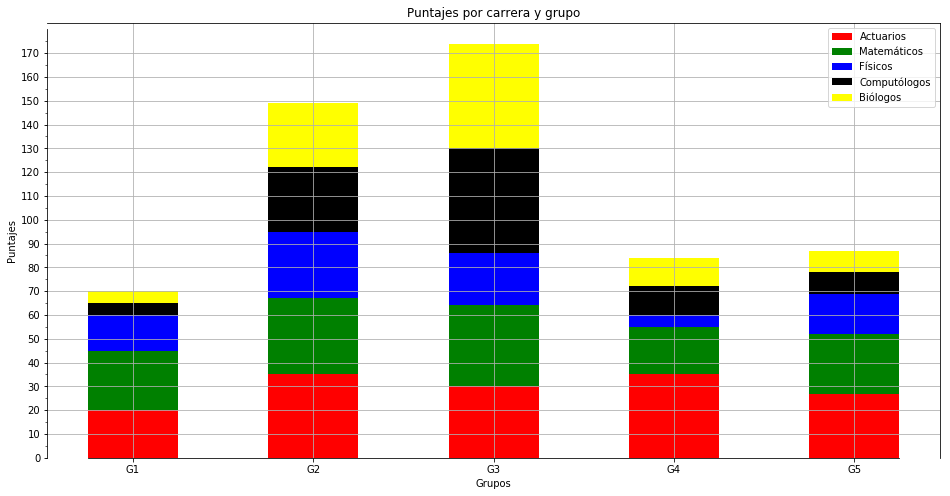

In [2]:
menMeans = [20, 35, 30, 35, 27]
womenMeans = [25, 32, 34, 20, 25]
homoMeans = [15, 28, 22, 5, 17]
lesbMeans = [5, 27, 44, 12, 9]
panMeans = [5, 27, 44, 12, 9]

colores = ['red', 'green', 'blue','black','yellow']

tuplaCategorias = ('G1', 'G2', 'G3', 'G4', 'G5')
tuplaLeyenda = ('Actuarios','Matemáticos','Físicos','Computólogos','Biólogos')

xlabel = 'Grupos'
ylabel = 'Puntajes'
title = 'Puntajes por carrera y grupo'

y_tick_menor, y_tick_mayor = 5, 10

tamanio_figura = (16,8)

listaDeMedias =[menMeans, womenMeans, homoMeans, lesbMeans, panMeans]

# Creamos el objeto:
x = StackedBar(listaDeMedias, colores, tuplaCategorias, tuplaLeyenda, xlabel, ylabel, 
               y_tick_menor, y_tick_mayor, title, tamanio_figura)
x.stackedBarSimple()

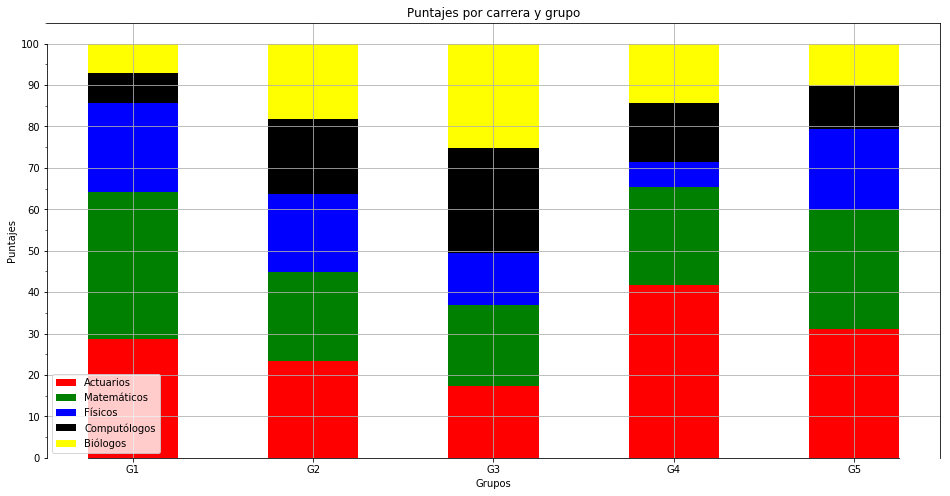

In [3]:
x.percentStackedBar()

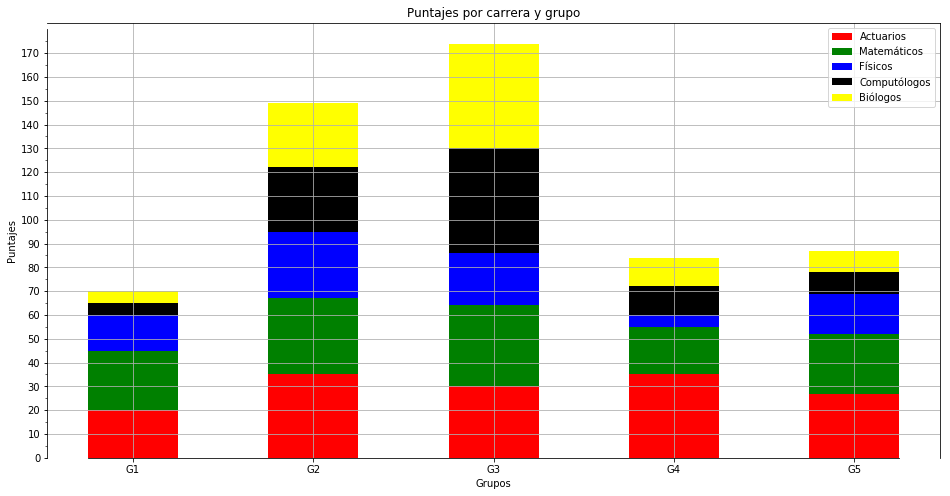

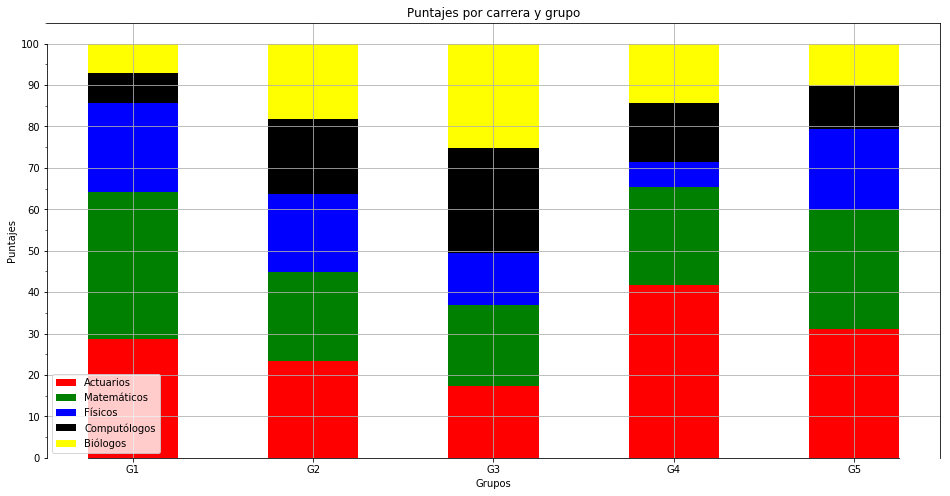

In [4]:
x.bothStackedBar()